<a href="https://colab.research.google.com/github/Fazloussatter/Stock-Price/blob/main/Fazlous_Tesla_Stock_Price_Prediction_using_Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tesla Stock Price Prediction using Facebook Prophet

###Importing essential packages

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

In [ ]:
# Initializing the plotly
import plotly.io as pio
pio.renderers.default='colab'

### Importing the dataset

In [ ]:
df=pd.read_csv('TSLA.csv')


### Now checking a few rows of the dataset

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,31.299999,32.991333,29.478001,29.671333,29.671333,307342500
1,2020-03-17,29.334000,31.456667,26.400000,28.680000,28.680000,359919000
2,2020-03-18,25.933332,26.990667,23.367332,24.081333,24.081333,356793000
3,2020-03-19,24.980000,30.133333,23.897333,28.509333,28.509333,452932500
4,2020-03-20,29.213333,31.799999,28.386000,28.502001,28.502001,424282500


### Gathering basic information about the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


### Gathering descriptive statistics about the data

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,138.246369,141.774422,134.254906,138.379317,138.379317,1.853566e+08
std,78.302853,79.791610,76.367220,78.329273,78.329273,9.918383e+07
min,24.980000,26.990667,23.367332,24.081333,24.081333,4.547310e+07
25%,64.967003,66.461334,62.855667,64.456333,64.456333,1.088487e+08
50%,136.317337,139.566666,133.886673,136.166672,136.166672,1.668480e+08
75%,202.183334,209.264999,195.583336,202.411667,202.411667,2.439548e+08
max,297.126678,300.133331,290.533325,294.363342,294.363342,6.663786e+08


### Visualizing the historical performance of Tesla

In [ ]:
# Creating an Area Chart

px.area(df, x='Date',y='Close')

In [ ]:
# Let's examine this price hike with a Line chart
px.line(df, x='Date',y='Close')

In [ ]:
# Now checking the volume by an Area Chat
px.area(df, x='Date',y='Volume')

In [ ]:
# Now rechecking it again with a Bar Chart
px.bar(df,y='Volume')

In [ ]:
# Now, checking the distribution with a Box Plot
px.box(df,y='Close')

### Again checking the dataframe

In [ ]:

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,31.299999,32.991333,29.478001,29.671333,29.671333,307342500
1,2020-03-17,29.334000,31.456667,26.400000,28.680000,28.680000,359919000
2,2020-03-18,25.933332,26.990667,23.367332,24.081333,24.081333,356793000
3,2020-03-19,24.980000,30.133333,23.897333,28.509333,28.509333,452932500
4,2020-03-20,29.213333,31.799999,28.386000,28.502001,28.502001,424282500


### Seecting the columns and creating a new dataframe

In [ ]:
columns=['Date', 'Close']
ndf=pd.DataFrame(df, columns=columns)

### Now checking the new dataframe

In [ ]:
ndf

,Date,Close
0,2020-03-16,29.671333
1,2020-03-17,28.680000
2,2020-03-18,24.081333
3,2020-03-19,28.509333
4,2020-03-20,28.502001
...,...,...
246,2021-03-08,187.666672
247,2021-03-09,224.526672
248,2021-03-10,222.686661
249,2021-03-11,233.199997


 ### Now installing and importing FB Prophet for forecasting

In [ ]:
!pip install prophet
from prophet import Prophet

### Renaming columns for the forecasting the price ups and down

In [ ]:
Prophet_df=ndf.rename(columns={'Date':'ds', 'Close':'y'})
Prophet_df

,ds,y
0,2020-03-16,29.671333
1,2020-03-17,28.680000
2,2020-03-18,24.081333
3,2020-03-19,28.509333
4,2020-03-20,28.502001
...,...,...
246,2021-03-08,187.666672
247,2021-03-09,224.526672
248,2021-03-10,222.686661
249,2021-03-11,233.199997


## Creating Facebook Prophet Model

In [ ]:
m=Prophet()
m.fit(Prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphjqnxliq/g41kmscb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphjqnxliq/mxjku6hx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51157', 'data', 'file=/tmp/tmphjqnxliq/g41kmscb.json', 'init=/tmp/tmphjqnxliq/mxjku6hx.json', 'output', 'file=/tmp/tmphjqnxliq/prophet_modelzup50l5w/prophet_model-20240314135148.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:51:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:51:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### Forecasting/ prediction on Facebook prophet

In [ ]:
future=m.make_future_dataframe(periods=60)
forecast=m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-16,21.803169,-9.619201,49.284749,21.803169,21.803169,-1.961986,-1.961986,-1.961986,-1.961986,-1.961986,-1.961986,0.0,0.0,0.0,19.841183
1,2020-03-17,22.402317,-6.340657,50.682355,22.402317,22.402317,-0.825291,-0.825291,-0.825291,-0.825291,-0.825291,-0.825291,0.0,0.0,0.0,21.577026
2,2020-03-18,23.001466,-8.471453,50.776597,23.001466,23.001466,-1.179661,-1.179661,-1.179661,-1.179661,-1.179661,-1.179661,0.0,0.0,0.0,21.821804
3,2020-03-19,23.600614,-6.841616,52.056696,23.600614,23.600614,-1.294875,-1.294875,-1.294875,-1.294875,-1.294875,-1.294875,0.0,0.0,0.0,22.305739
4,2020-03-20,24.199763,-8.706613,49.275691,24.199763,24.199763,-2.584084,-2.584084,-2.584084,-2.584084,-2.584084,-2.584084,0.0,0.0,0.0,21.615679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,2021-05-07,324.517367,294.972198,351.771170,323.193265,325.893899,-2.584084,-2.584084,-2.584084,-2.584084,-2.584084,-2.584084,0.0,0.0,0.0,321.933283
307,2021-05-08,325.335082,300.081248,356.670330,323.963816,326.737271,3.922950,3.922950,3.922950,3.922950,3.922950,3.922950,0.0,0.0,0.0,329.258031
308,2021-05-09,326.152796,301.431386,357.764214,324.756763,327.625493,3.922948,3.922948,3.922948,3.922948,3.922948,3.922948,0.0,0.0,0.0,330.075744
309,2021-05-10,326.970510,295.599649,354.111146,325.548041,328.481542,-1.961986,-1.961986,-1.961986,-1.961986,-1.961986,-1.961986,0.0,0.0,0.0,325.008524


### As yhat column is most importan, so we are now creating a Line Chart with that.

In [ ]:
px.line(forecast, x='ds', y='yhat')

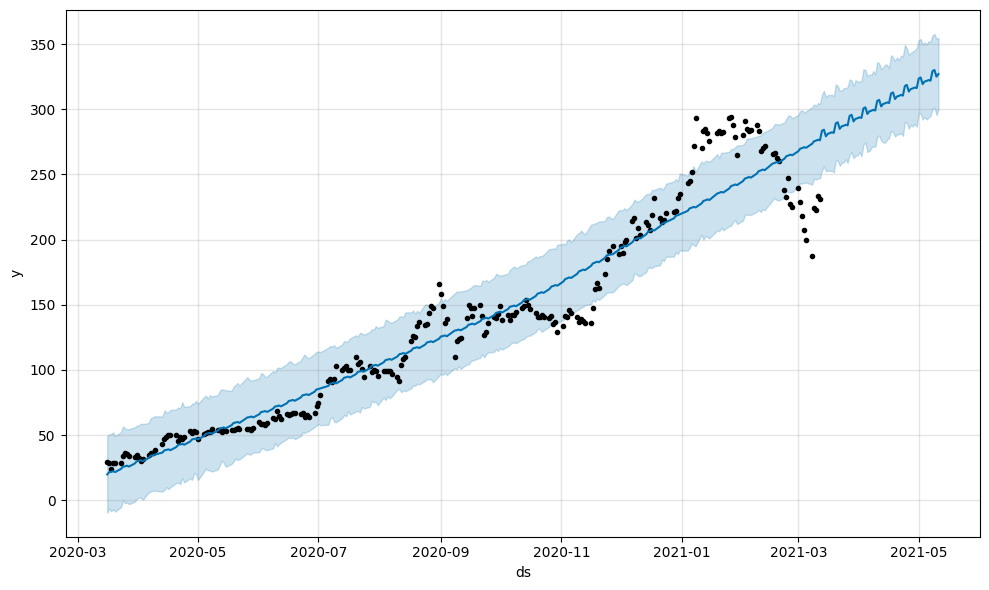

In [ ]:
figure=m.plot(forecast, xlabel='ds', ylabel='y')

### Importing matplotlib to observe the various components

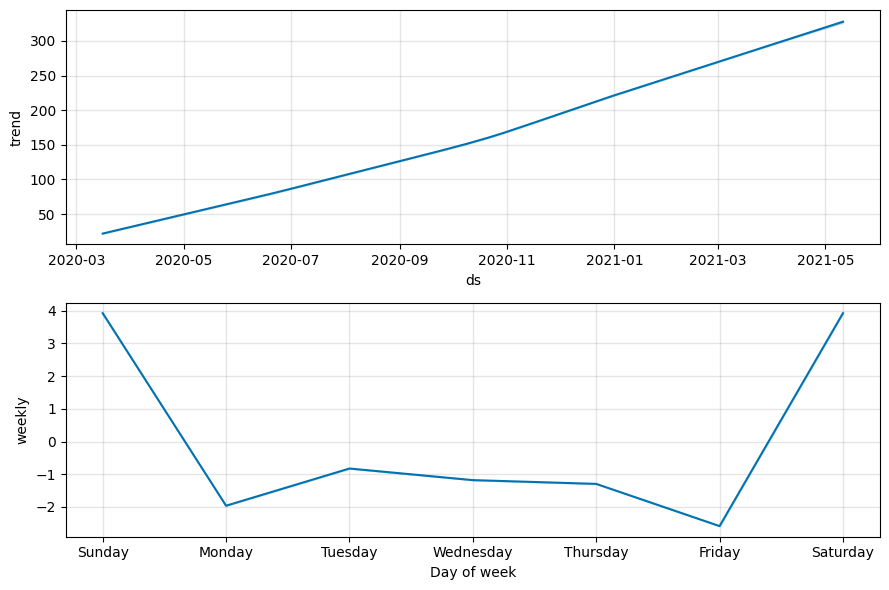

In [ ]:
import matplotlib.pyplot as plt
figure2=m.plot_components(forecast)

### Downloading the forecast data as a csv file

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>